<a href="https://colab.research.google.com/github/niteshchobdar38/EDA-project/blob/main/Nitesh_Play_Store_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Mounting  drive to access our dataset.
df_data= pd.read_csv("/content/drive/MyDrive/Play Store Data.csv")
df_reviews= pd.read_csv("/content/drive/MyDrive/User Reviews.csv")

**checking head of data**


In [5]:
#checking first raw of dataset
df_data.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


In [6]:
# Checking the maximum rows and columns available in our datasets.
df_data.shape, df_reviews.shape

((10841, 13), (64295, 5))

In [7]:
#checking informations of dataset
df_data.info, df_reviews.info

(<bound method DataFrame.info of                                                      App             Category  \
 0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
 1                                    Coloring book moana       ART_AND_DESIGN   
 2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
 3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
 4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
 ...                                                  ...                  ...   
 10836                                   Sya9a Maroc - FR               FAMILY   
 10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
 10838                             Parkinson Exercices FR              MEDICAL   
 10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
 10840      iHoroscope - 2018 Daily Horoscope & Astrology         

In [8]:
# Determining duplicate values in our play store dataset and reviews.
df_data.duplicated().sum(),df_reviews.duplicated().sum()

(483, 33616)

In [9]:
# Dropping the duplicate values from both the datasets.
df_non_dup_data= df_data.drop_duplicates()

In [10]:
# Rechecking the shape of our play store dataset after dropping all the duplicates.
df_non_dup_data.shape

(10358, 13)

In [11]:
#Rechecking our play store dataset wheather they have any more duplicate values.
df_non_dup_data.duplicated().sum()

0

###**It's good to know that we don't have more duplicate values in both the dataset but still we have some null and missing values. Let's deal with them here.**

In [12]:
# Defining the function 
def get_info(df):
  func_df= pd.DataFrame(index= df.columns, columns=["datatype", "total_values", "na_values", "non_na_values", "%na_values", "unique_count"])
  func_df["datatype"]= [type(i) for i in list(df.columns)]
  func_df["total_values"]= [len(df[i]) for i in list(df.columns)]
  func_df["na_values"]= [df[i].isnull().sum() for i in list(df.columns)]
  func_df["non_na_values"]= [(~df[i].isnull()).sum() for i in list(df.columns)]
  func_df["%na_values"]= [df[i].isnull().mean()*100 for i in list(df.columns)]
  func_df["unique_count"]= [len(df[i].unique()) for i in list(df.columns)]
  return func_df

In [13]:
get_info(df_non_dup_data)

,datatype,total_values,na_values,non_na_values,%na_values,unique_count
App,<class 'str'>,10358,0,10358,0.000000,9660
Category,<class 'str'>,10358,0,10358,0.000000,34
Rating,<class 'str'>,10358,1465,8893,14.143657,41
Reviews,<class 'str'>,10358,0,10358,0.000000,6002
Size,<class 'str'>,10358,0,10358,0.000000,462
Installs,<class 'str'>,10358,0,10358,0.000000,22
Type,<class 'str'>,10358,1,10357,0.009654,4
Price,<class 'str'>,10358,0,10358,0.000000,93
Content Rating,<class 'str'>,10358,1,10357,0.009654,7
Genres,<class 'str'>,10358,0,10358,0.000000,120


The total null values in df_non_dup_data dataset are:

*   Rating = 1465
*   Type = 1
*   Content Rating = 1
*   Current Ver = 8
*   Android Ver = 3

Since we have 0.009654%, 0.009654%, 0.077235%, 0.028963% null values in Type, Content Rating, Current Ver, Android Ver columns respectively which won't affect our results, so we can drop them and get insights about it.

Replacing all the null values of "Rating" column with **Mode**. Since we can not drop these values.





In [14]:
df_non_dup_data.dropna(subset=["Type","Content Rating","Current Ver","Android Ver"], inplace= True)

<ipython-input-14-3e6b7b30f282>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_dup_data.dropna(subset=["Type","Content Rating","Current Ver","Android Ver"], inplace= True)


In [15]:
get_info(df_non_dup_data)

,datatype,total_values,na_values,non_na_values,%na_values,unique_count
App,<class 'str'>,10346,0,10346,0.000000,9648
Category,<class 'str'>,10346,0,10346,0.000000,33
Rating,<class 'str'>,10346,1460,8886,14.111734,40
Reviews,<class 'str'>,10346,0,10346,0.000000,5999
Size,<class 'str'>,10346,0,10346,0.000000,457
Installs,<class 'str'>,10346,0,10346,0.000000,20
Type,<class 'str'>,10346,0,10346,0.000000,2
Price,<class 'str'>,10346,0,10346,0.000000,92
Content Rating,<class 'str'>,10346,0,10346,0.000000,6
Genres,<class 'str'>,10346,0,10346,0.000000,119


In [16]:
# Checking the mode in our df_non_dup_data rating column of our dataset.
df_non_dup_data["Rating"].mode()

0    4.4
Name: Rating, dtype: float64

In [17]:
# Converting the series object into numpy float type object.
df_non_dup_data["Rating"].mode()[0]

4.4

In [18]:
df_non_dup_non_na_data= df_non_dup_data.fillna(df_non_dup_data["Rating"].mode()[0])

In [19]:
get_info(df_non_dup_non_na_data )

,datatype,total_values,na_values,non_na_values,%na_values,unique_count
App,<class 'str'>,10346,0,10346,0.0,9648
Category,<class 'str'>,10346,0,10346,0.0,33
Rating,<class 'str'>,10346,0,10346,0.0,39
Reviews,<class 'str'>,10346,0,10346,0.0,5999
Size,<class 'str'>,10346,0,10346,0.0,457
Installs,<class 'str'>,10346,0,10346,0.0,20
Type,<class 'str'>,10346,0,10346,0.0,2
Price,<class 'str'>,10346,0,10346,0.0,92
Content Rating,<class 'str'>,10346,0,10346,0.0,6
Genres,<class 'str'>,10346,0,10346,0.0,119


**Hurray! We have succesfully removed all the null and duplicate values from our play store dataset. Let us now do the same thing from user review dataset.**

In [20]:
df_non_dup_reviews= df_reviews.drop_duplicates()

In [21]:
get_info(df_non_dup_reviews)

,datatype,total_values,na_values,non_na_values,%na_values,unique_count
App,<class 'str'>,30679,0,30679,0.000000,1074
Translated_Review,<class 'str'>,30679,987,29692,3.217184,27995
Sentiment,<class 'str'>,30679,982,29697,3.200887,4
Sentiment_Polarity,<class 'str'>,30679,982,29697,3.200887,5411
Sentiment_Subjectivity,<class 'str'>,30679,982,29697,3.200887,4475


In [22]:
df_non_dup_non_na_reviews= df_non_dup_reviews.dropna()

In [23]:
get_info(df_non_dup_non_na_reviews)

,datatype,total_values,na_values,non_na_values,%na_values,unique_count
App,<class 'str'>,29692,0,29692,0.0,865
Translated_Review,<class 'str'>,29692,0,29692,0.0,27994
Sentiment,<class 'str'>,29692,0,29692,0.0,3
Sentiment_Polarity,<class 'str'>,29692,0,29692,0.0,5410
Sentiment_Subjectivity,<class 'str'>,29692,0,29692,0.0,4474


In [24]:
df_non_dup_non_na_data.shape, df_non_dup_non_na_reviews.shape

((10346, 13), (29692, 5))

**We have succesfully dropped all the null and duplicated rows from both the datasets. But from the information of data frame, we can see that 

1.all the columns except rating have the object data type but some of the columns like, reviews, size, installs and price have the numerical value. So, we have to transform them into a proper data type and 

2.also remove the unwanted values from the numerical columns like ‘+’ and ‘,’ from installs and ‘$’ from price. 

3.In the size column we have some values in KB and some values in MB, so we transform all the values in MB.**

In [25]:
# List of characters to remove
list_of_chars = ['+', ',' , '$' ]
# List of column names to clean
list_of_columns = ['Installs', 'Price']

# Loop for each column
for col in list_of_columns:
    # Replace each character with an empty string
    for char in list_of_chars:
        df_non_dup_non_na_data[col] = df_non_dup_non_na_data[col].astype(str).str.replace(char, '')
    # Convert col to numeric
    df_non_dup_non_na_data[col] = pd.to_numeric(df_non_dup_non_na_data[col]) 
    

<ipython-input-25-edb72a7f5b69>:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_non_dup_non_na_data[col] = df_non_dup_non_na_data[col].astype(str).str.replace(char, '')


In [26]:
df_non_dup_non_na_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10346 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10346 non-null  object 
 1   Category        10346 non-null  object 
 2   Rating          10346 non-null  float64
 3   Reviews         10346 non-null  object 
 4   Size            10346 non-null  object 
 5   Installs        10346 non-null  int64  
 6   Type            10346 non-null  object 
 7   Price           10346 non-null  float64
 8   Content Rating  10346 non-null  object 
 9   Genres          10346 non-null  object 
 10  Last Updated    10346 non-null  object 
 11  Current Ver     10346 non-null  object 
 12  Android Ver     10346 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.1+ MB


In [27]:
def convert(i):
  if 'k' in i:
    return float(i[:-1])/1024
  elif 'M' in i:
    return float(i[:-1])
  else:
    return 

df_non_dup_non_na_data['Size']=df_non_dup_non_na_data['Size'].apply(convert)

In [28]:
df_non_dup_non_na_data['Size']  

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839     NaN
10840    19.0
Name: Size, Length: 10346, dtype: float64

# **Nitesh** **chobdar**

In [29]:
final_df_data=df_non_dup_non_na_data.copy()
final_df_data.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


In [30]:
#creating app content rating
app_content_rating=final_df_data['Content Rating'].value_counts()

**line** **graph** **for** **app** **content**

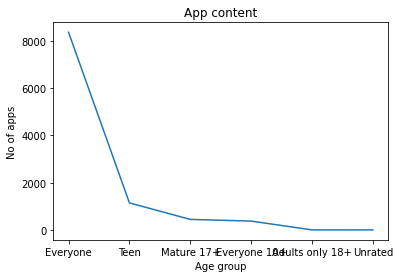

In [31]:
app_content_rating.plot()

plt.title('App content')
plt.ylabel('No of apps')
plt.xlabel('Age group')
plt.rcParams['figure.figsize'] = (30, 5)

### *Insights* - we can see mostly apps are available for **"**Everyone**"** .
  - we can also see around 1200 apps are availables for 'Teenagers'.


In [32]:
#Let's find out the relation between content rating and app count!
abc = final_df_data['Content Rating'].value_counts().index
xyz = final_df_data['Content Rating'].value_counts()
#creating empty lists to append elements
abc_list = [] 
xyz_list = []
for i in range(len(abc)):
    abc_list.append(abc[i])
    xyz_list.append(xyz[i])

plotting  Bar graph between apps count and content rating

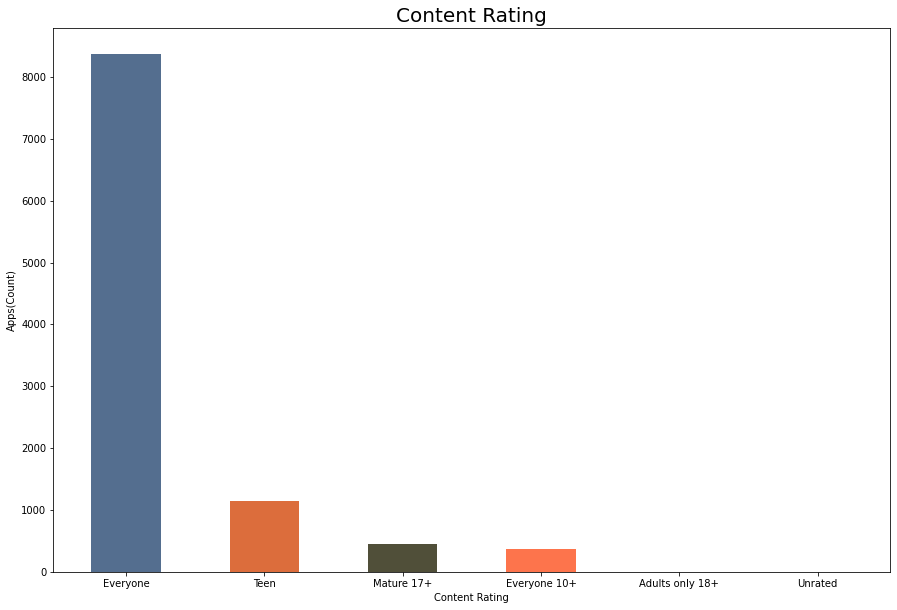

In [33]:
plt.figure(figsize=(15,10))
plt.bar(abc_list,xyz_list,width=0.5,color=['#294A73','#D4480B','#242307','#FD511F','#158EA6','#E82865'], alpha=0.8);
plt.title('Content Rating',size = 20);
plt.ylabel('Apps(Count)');
plt.xlabel('Content Rating');

**Inferences**: Content rating vs no of apps:


1.   Mostly 90% of total apps are targetting audience in every age group and hence open for everyone.
2.   Very few(less then 500 apps) are catering to only adult population i.e Mature 17+



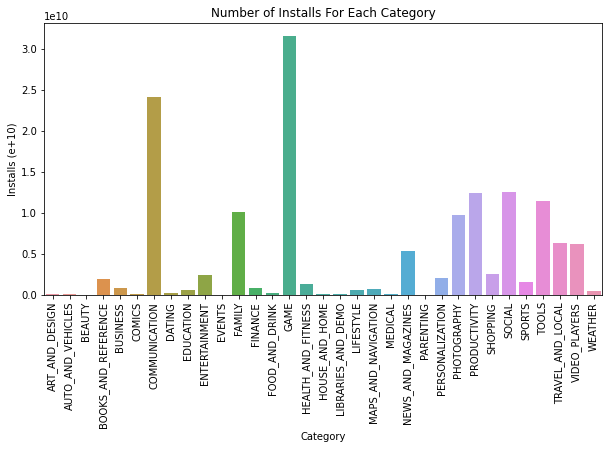

In [34]:
#No of installs in each category:
categories=final_df_data.groupby('Category')
category_installs_sum_df = categories[['Installs']].sum()
# to convert groupby object into dataframe
category_installs_sum_df = category_installs_sum_df.reset_index()  

plt.figure(figsize=(10, 5))
sns.barplot(x='Category', y='Installs', data=category_installs_sum_df)
plt.xticks(rotation=90)
plt.ylabel('Installs (e+10)')
plt.title('Number of Installs For Each Category')
plt.show()

#**Inferences**:

1.  From the above barplot, we can see that most of the downloaded apps are from the categories of 'Game' and 'Communication'.Earlier, we also saw that the price of gaming apps is the least among all the categories.This can be meaningfully attributed towards the 'new wave' of gaming as a career choice. Owing to this transition, companies are more eager to launch product/apps in the gaming category. This can be confirmed with the information that gaming category has one of the highest no of apps on playstore.
2.   We can highlight that the business category has very few installs despite listing one of the highest no of apps on playstore.



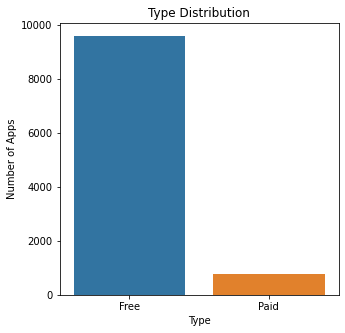

In [35]:
# application type distribution
plt.figure(figsize=(5,5))
sns.countplot(x=final_df_data['Type'])
plt.title('Type Distribution')
plt.ylabel('Number of Apps')
plt.show()

#**Inferences:**

1.   From this distribution, we can see that over 9000 apps are freely available while close to 1000 apps are in the paid category.
2.   Considering the other information, we can even see a **'drastic dip'** in the no of installs of free apps vs paid apps.

**What** **is** **the** **ratio** **of** **paid** **apps** **over** **free** **apps**?

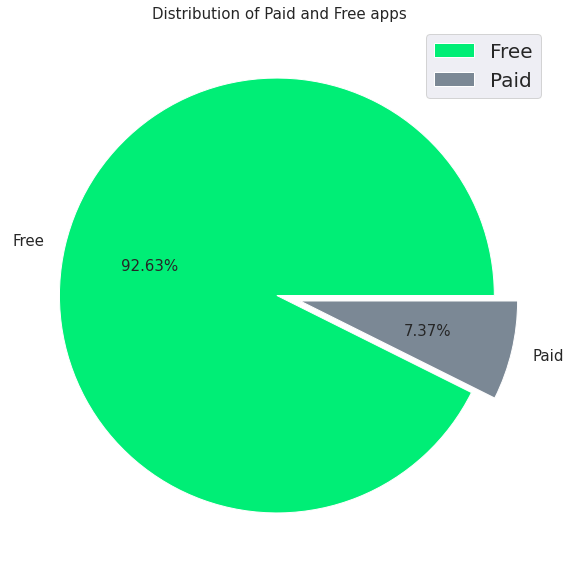

In [46]:
#pie chart
data = df_non_dup_non_na_data['Type'].value_counts() 
labels = ['Free', 'Paid']

# create pie chart
plt.figure(figsize=(10,10))
colors = ["#00EE76","#7B8895"]
explode=(0.01,0.1)
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%',explode=explode,textprops={'fontsize': 15})
plt.title('Distribution of Paid and Free apps',size=15,loc='center')
plt.legend()


**Inferences**:
1. we can see more than 92% apps are free on playstore.
2. less tham 8% apps are paid on playstore.

**How does the size of an app affect the ratings and number of installs?**

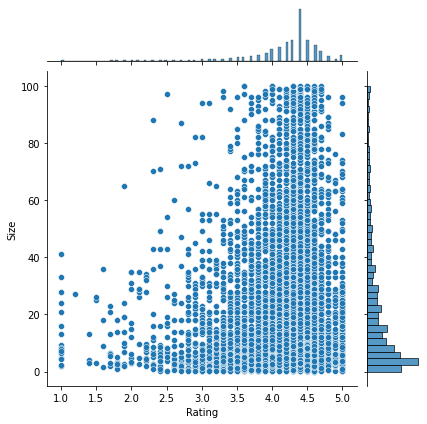

In [36]:
#jointplot for size and ratings and number of installs
jointplot=sns.jointplot(x='Rating',y='Size',data=final_df_data)
plt.show()

##**Inferences:**


1.   People generally prefer apps with less size due to data and/ size  constraints. This can be confirmed with the above jointplot. As the size of an app increases, it's rating decreases. 
2.   Surprisingly, there are few apps whose size is close to 100 MBs but has 4/5 stars as a review. Though this number is less, we can't ignore a fact that the rating also depends upon the content that the app is serving.
3. we can see from graph most of the app are from 15mb to 40mb and as we know all the ratings of apps are quiet as well 4-4.5



**Percentage** **of** **review** **sentiments**

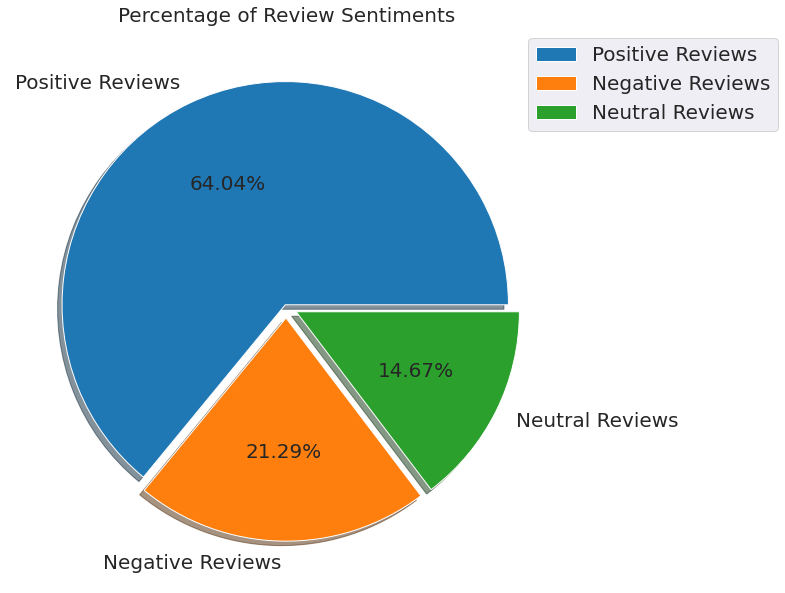

In [45]:
import matplotlib
counts = list(df_non_dup_non_na_reviews['Sentiment'].value_counts())
labels = 'Positive Reviews', 'Negative Reviews','Neutral Reviews'
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.figsize'] = (10, 15)
plt.pie(counts, labels=labels, explode=[0.01, 0.05, 0.05], shadow=True, autopct="%.2f%%")
plt.title('Percentage of Review Sentiments', fontsize=20)
plt.axis('off')
plt.legend(bbox_to_anchor=(0.9, 0, 0.5, 1))
plt.show()

**Inferences** :
1. Netural Reviews are 14.67%
2. Negative Reviews are 21.29%
3. Positive Reviews are 64.04%

Text(0.5, 1.0, 'App pricing trend across categories')

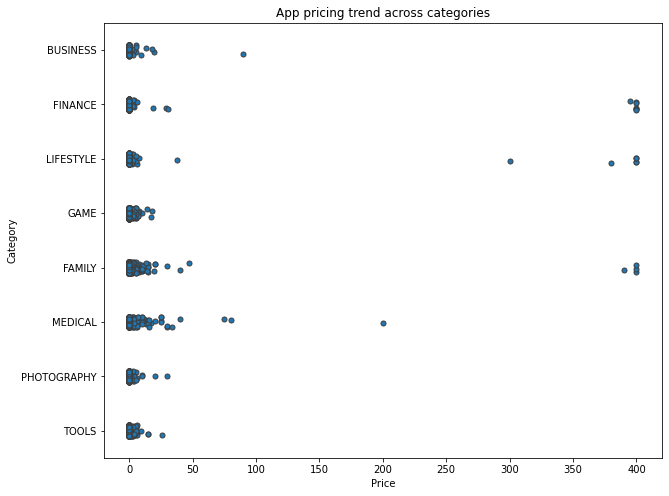

In [37]:
#App price trends across various categories 
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)

# Select a few popular app categories
popular_app_cats = final_df_data[final_df_data.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Apps whose Price is greater than 200
# apps_above_200 = popular_app_cats[['Category', 'App', 'Price']][popular_app_cats['Price'] > 200]
# apps_above_200

# **Infereances**:
- Most number of gaming apps are free.
-Highest paid apps are from finace and Lifestyles.
- price of mostly apps are between 0 to 50.


#Rating vs Size of Apps

Text(0.5, 1.02, 'Rating vs Size of Apps')

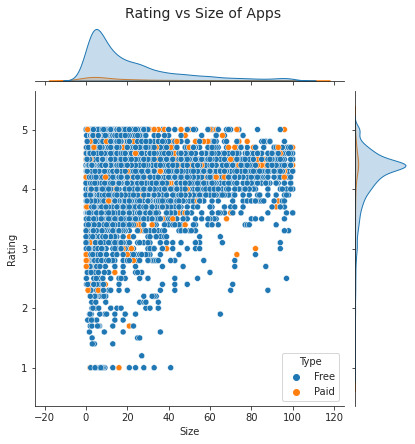

In [38]:
sns.set_style("ticks")

ax = sns.jointplot(data=final_df_data, x= "Size", y = "Rating" , hue="Type")
ax.fig.suptitle("Rating vs Size of Apps", y = 1.02, fontsize=14 )

**Inferences:**

We can observe that there are very few apps with large size are paid and also high rated. So we can conclude that people are looking for apps which are free as well as less in size.
One interesting oberservation is that even though few apps are large in size, they have good ratings. The possible reason could be the price which is zero.

Also, some of the paid apps has less ratings. So price and ratings are poorly correlated.

**Jointplot** **for** **Rating** **vs** **Size** **of** **Apps**

Text(0.5, 1.02, 'Rating vs Size of Apps')

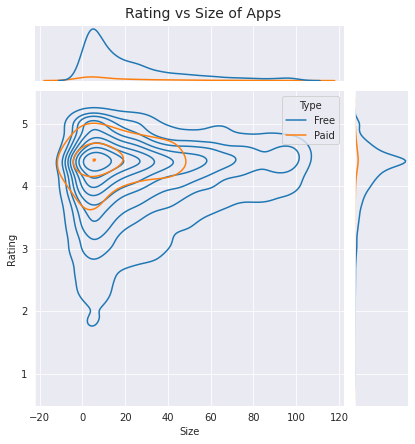

In [39]:
sns.set_style("darkgrid")

ax = sns.jointplot(data=final_df_data, x= "Size", y = "Rating" , hue="Type", kind="kde")
ax.fig.suptitle("Rating vs Size of Apps", y = 1.02, fontsize=14 )

#Heatmap for rating


Text(249.0, 0.5, 'Rating')

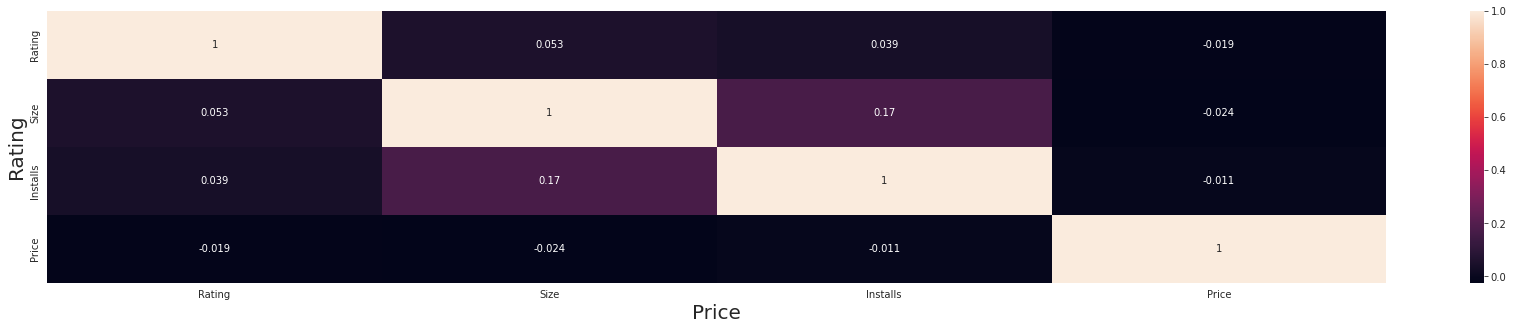

In [40]:
sns.heatmap(df_non_dup_non_na_data.corr(),annot=True)
plt.xlabel('Price',fontsize=20)
plt.ylabel('Rating',fontsize=20)

**inferences**-   price and rating are poorly connected.
 we can see some free apps are highly rated.
There is a strong positive correlation between the Reviews and Installs column. This is pretty much obvious. Higher the number of installs, higher is the user base, and higher are the total number of reviews dropped by the users.
ThePriceis slightly negatively correlated with the Rating, Reviews, and Installs. This means that as the prices of the app increases, the average rating, total number of reviews and Installs fall slightly.
TheRating is slightly positively correlated with theInstalls and Reviews column. This indicates that as the the average user rating increases, the app installs and number of reviews also increase.

#Pair Plot

/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Pairwise Plot - Rating, Size, Installs, Price')

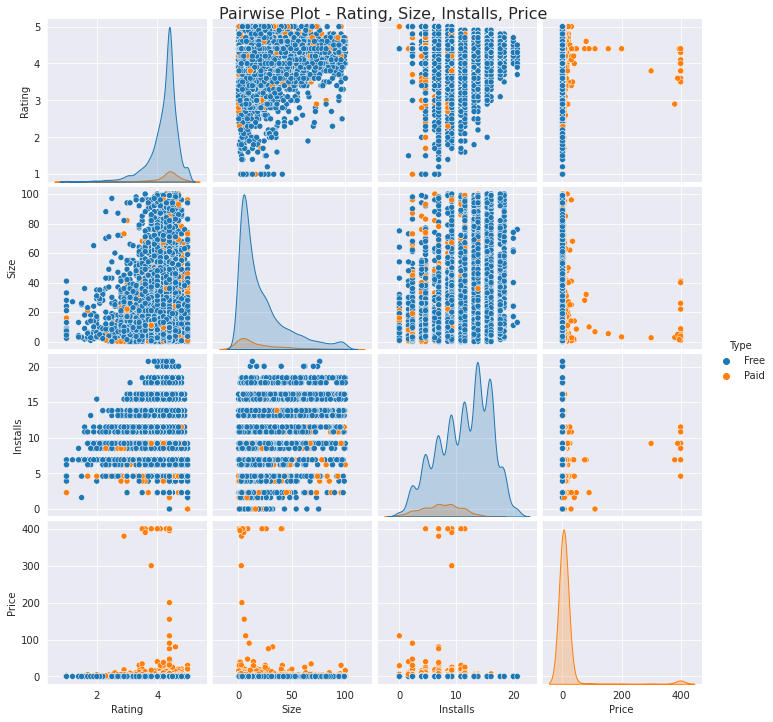

In [41]:
Rating = final_df_data['Rating']
Size = final_df_data['Size']
Installs = final_df_data['Installs']
Type = final_df_data['Type']
Price = final_df_data['Price']

df_pairplot = sns.pairplot(pd.DataFrame(list(zip(Rating, Size, np.log(Installs), Price, Type)), 
                        columns=['Rating','Size', 'Installs', 'Price','Type']), hue='Type')
df_pairplot.fig.suptitle("Pairwise Plot - Rating, Size, Installs, Price",x=0.5, y=1.0, fontsize=16)

**Inferences**-  Mostly installed apps are free.
- Mostly user  want to installs apps having size less than 50mb.
- Price and ratings are  poorly connected.

**Plotting** **Kernal** **Distribution** **Estimation** **plot** for probability density of Distribution of Price

<ipython-input-42-80f4de3b3a43>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  graph = sns.kdeplot(final_df_data.Price, color="Red", shade = True)


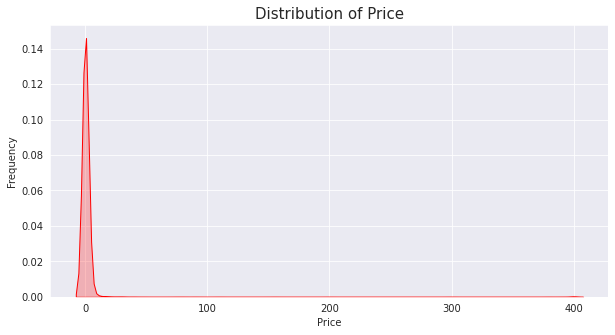

In [42]:
plt.figure(figsize=(10,5))
plt.xlabel("Price")
plt.ylabel("Frequency")
graph = sns.kdeplot(final_df_data.Price, color="Red", shade = True)
plt.title('Distribution of Price',size = 15);

**Inferences**- we can see mostly number of installed apps are free apps.
- we can see users rarely installs Paid apps.


 **Plotting**  **graph** **for** **installs** **per** **rating**

Text(0.5, 1.0, 'Installs per Rating')

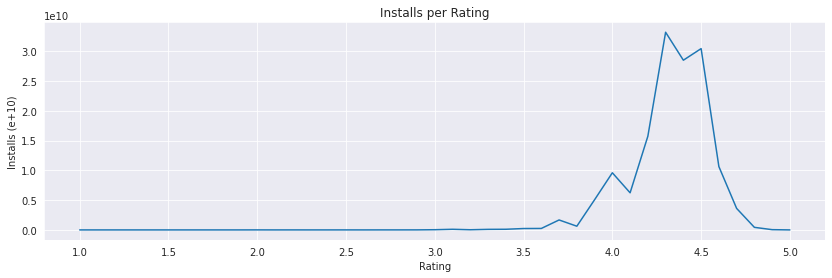

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
df_rats=final_df_data.groupby('Rating').sum().reset_index()
fig, plot	= plt.subplots(figsize=(14,4))
plt.plot(df_rats['Rating'],df_rats['Installs'])
plot.set_xlabel('Rating')
plot.set_ylabel('Installs (e+10)')
plot.set_title('Installs per Rating')

**Inferences**- mostly installed apps are rated between 4 to 4.5.

 -very few number of apps are rated with 5.
